In [23]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import re
import cv2

foreground_threshold = 0.25 # percentage of pixels > 1 required to assign a foreground label to a patch

# assign a label to a patch
def patch_to_label(patch):
    df = np.mean(patch)
    if df > foreground_threshold:
        return 1
    else:
        return 0


def mask_to_submission_strings(image_filename):
    """Reads a single image and outputs the strings that should go into the submission file"""
    img_number = int(re.search(r"\d+", image_filename).group(0))
    im = mpimg.imread(image_filename)
    patch_size = 16
    for j in range(0, im.shape[1], patch_size):
        for i in range(0, im.shape[0], patch_size):
            patch = im[i:i + patch_size, j:j + patch_size]
            label = patch_to_label(patch)
            yield("{:03d}_{}_{},{}".format(img_number, j, i, label))


def masks_to_submission(submission_filename, *image_filenames):
    """Converts images into a submission file"""
    with open(submission_filename, 'w') as f:
        f.write('id,prediction\n')
        for fn in image_filenames[0:]:
            f.writelines('{}\n'.format(s) for s in mask_to_submission_strings(fn))


In [13]:
submission_filename = 'dummy_submission.csv'
image_filenames = []
for i in range(1, 51):
    image_filename = 'data/training/groundtruth/satImage_' + '%.3d' % i + '.png'
    print (image_filename)
    image_filenames.append(image_filename)
#masks_to_submission(submission_filename, *image_filenames)

data/training/groundtruth/satImage_001.png
data/training/groundtruth/satImage_002.png
data/training/groundtruth/satImage_003.png
data/training/groundtruth/satImage_004.png
data/training/groundtruth/satImage_005.png
data/training/groundtruth/satImage_006.png
data/training/groundtruth/satImage_007.png
data/training/groundtruth/satImage_008.png
data/training/groundtruth/satImage_009.png
data/training/groundtruth/satImage_010.png
data/training/groundtruth/satImage_011.png
data/training/groundtruth/satImage_012.png
data/training/groundtruth/satImage_013.png
data/training/groundtruth/satImage_014.png
data/training/groundtruth/satImage_015.png
data/training/groundtruth/satImage_016.png
data/training/groundtruth/satImage_017.png
data/training/groundtruth/satImage_018.png
data/training/groundtruth/satImage_019.png
data/training/groundtruth/satImage_020.png
data/training/groundtruth/satImage_021.png
data/training/groundtruth/satImage_022.png
data/training/groundtruth/satImage_023.png
data/traini

In [55]:
# load model 
from keras.models import load_model
model = load_model('first_model.h5', compile=False)

In [56]:
# get test images names
test_img_filenames = []
for i in range(1, 51):
    image_filename = 'data/test_set_images/test_' + '%.1d' % i + '/test_'+ '%.1d' % i + '.png'
    test_img_filenames.append(image_filename)


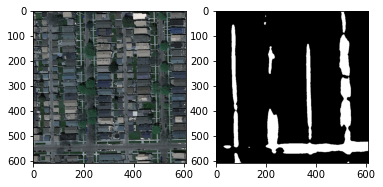

In [80]:
img = cv2.imread(test_img_filenames[34]) / 255.
img =np.expand_dims(img, 0)
prediction = (model.predict(img)[0,:,:,0] > 0.557 ).astype(np.uint8)
plt.subplot(121)
plt.imshow(img[0,:,:,:])
plt.subplot(122)
plt.imshow(prediction, cmap='gray')

In [67]:
test_imgs = np.array([cv2.imread(test_img_filenames[i]) / 255. for i in range (0,50)])
#img =np.expand_dims(img, 0)
#prediction = model.predict(img) > 0.575
#plt.subplot(121)
#plt.imshow(img[0,:,:,:])
#plt.subplot(122)
#plt.imshow(prediction[0,:,:,0], cmap='gray')
test_imgs.shape

(50, 608, 608, 3)